In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('OnlineNewsPopularity.csv', header=0)

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [5]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
    

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
X = df[0:58]
Y = df['shares']

In [7]:
# Get the statistics of original target attribute
data = df[df.keys()[-1]]
data.describe()
# Encode the label by threshold 1400
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(data>=1400))

In [8]:
popular = df.shares >= 1400
unpopular = df.shares < 1400
df.loc[popular,'shares'] = 1
df.loc[unpopular,'shares'] = 0

In [9]:
features=list(df.columns[2:60])

In [10]:
# split dataset to 60-40 training and testing resp.
X_train, X_test, y_train, y_test = train_test_split(df[features], df['shares'], test_size=0.4, random_state=0)

#Shape of  training and test datasets
print(X_train.shape)
print(y_train.shape)

(23786, 58)
(23786,)


In [11]:
#Decision Tree model and accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
model1 = DecisionTreeClassifier(min_samples_split = 12, random_state = 52)
model1_dt = model1.fit(X_train,y_train)
print("The accuracy of the model is {:.2f}".format(model1_dt.score(X_test,y_test)))

The accuracy of the model is 0.58


In [12]:
#Accuracy of Decision Tree model
scores = cross_val_score(model1, df[features], df['shares'], cv=5)
print(scores)
print("The mean of the model is {:.2f}".format(scores.mean()))

[0.50737798 0.53260184 0.57775255 0.58317568 0.56962664]
The mean of the model is 0.55


In [13]:
# Random Forest model and accuracy
model2 = RandomForestClassifier(n_estimators=100,n_jobs=-1)
model2_rf = model2.fit(X_train,y_train)
print("The accuracy of the model is {:.2f}".format(model2_rf.score(X_test,y_test)))

The accuracy of the model is 0.66


In [16]:
#Accuracy of Random Forest model
scores = cross_val_score(model2, df[features], df['shares'], cv=5)
print(scores)
print("The mean of the model is {:.2f}".format(scores.mean()))

[0.56451003 0.64409131 0.66023458 0.67133308 0.66372351]
The mean of the model is 0.64


In [17]:
# KNN model and accuracy
model3 = KNeighborsClassifier()
model3_knn=model3.fit(X_train, y_train)
print("The accuracy of the model is {:.2f}".format(model3_knn.score(X_test,y_test)))

The accuracy of the model is 0.57


In [18]:
#Accuracy of KNN model
scores = cross_val_score(model3, df[features], df['shares'], cv=5)
print(scores)
print("The mean of the model is {:.2f}".format(scores.mean()))

[0.53171901 0.52427797 0.56198764 0.56791525 0.56004036]
The mean of the model is 0.55


In [19]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()]

In [20]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__  
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 56.6402%
Log Loss: 4.59322455897761
DecisionTreeClassifier
****Results****
Accuracy: 57.8131%
Log Loss: 14.570842103793195
RandomForestClassifier
****Results****
Accuracy: 62.0507%
Log Loss: 0.8351424789149574
GaussianNB
****Results****
Accuracy: 53.0016%
Log Loss: 1.0520962278341948


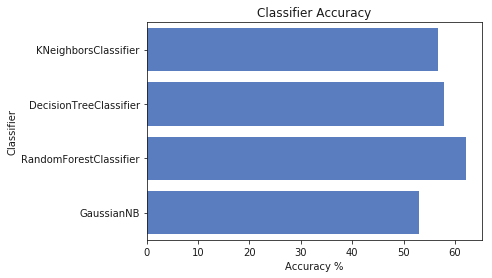

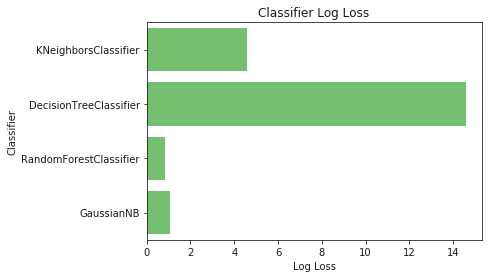

In [21]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()